# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  -

TOURÉ Ousmane  -

#### Imports

In [1]:
from Function_Copy1 import *

#### Data Importation

In [2]:
CSV_path=r"C:\Users\admin\Desktop\Gestion ptf (cours)\48_Industry_Portfolios.csv" #enter your path linked to the location of your csv file for import


Data = pd.read_csv(CSV_path)
Data.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
Data['Date'] = pd.to_datetime(Data['Date'], format='%Y%m').dt.date.apply(lambda x: x.strftime('%Y-%m'))
Data.set_index('Date', inplace=True)

#### Selection of 5 industry

In [3]:
#Data_select =  Data.sample(n=5,axis='columns') # For reproducability we keep the first 5 industries select by the sample founction
# Meals,Guns,Hshld,Oil,Txtls


Data_select = Data[['Meals','Guns ','Hshld','Oil  ','Txtls']]

Industrie_selected = Data_select.columns

# We keep only the data after 2000 :

Data_select = Data_select[Data_select.index >= '2000-01']

## Part 1 

### A/ Mean-Variance frontier without risk-free asset (with short sell) :

###### Estimation of the covariance-matrix and expected return   :

In [4]:
# Expected return : other possible approach simple machine learning with technical indicator 

E_return = Data_select.mean() # Just for test

E_cov = Data_select.cov() # Just for test

###### Constraintes : 

In [5]:
## Generale : 

# Initialisation of the weigth for optimisation  :

Initial_weights = np.array([1 / len(E_return)] * len(E_return))

constraints = (
  {'type': 'eq', 'fun': lambda x: np.sum(x*E_return.values) - target}, # Optimization for a target return 
  {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} # Sum of the weigth need to sum to 1
)



# Define boundaries for weigth : 
bounds = tuple((0, 1) for w in Initial_weights) # If short sell impossible 

## Maximum-return portfolio  :

constraints_max_ret = ( {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Sum of the weigth need to sum to 1

# Define boundaries for weigth (max 2 of leverage) : 

bounds_short_sell = tuple((-2, 2) for w in Initial_weights) # If short sell possible under limit

## Minimum variance portfolio

constraints_min_var = ( {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})



#### Determination of the maximum return portfolio (undercertain constraintes) :

In [6]:
Max_return_result = Max_return_ptf(Initial_weights,bounds_short_sell,constraints_max_ret,Industrie_selected,E_return)

##### Determination of the minimum-variance  portfolio  :

In [7]:
Min_var_result = Min_var_ptf(Initial_weights,bounds_short_sell,constraints_min_var,Industrie_selected,E_cov,E_return)

In [8]:
Min_var_result['Min_var_weigth']

,Meals,Guns,Hshld,Oil,Txtls
Weigth,0.257925,0.148506,0.657359,0.08253,-0.14632


##### Determination of the optimal  portfolio  for a given return  :

In [9]:
## Input : 

Nbr_PTF = 100

# Initialize the target return use for the frontier :

Target_return = np.linspace (Min_var_result['Min_var_return'].iloc[0]['return'],Max_return_result['Max_ret_return'].iloc[0]['return'],Nbr_PTF)

# Initialize un empty array for the differente variance value optimize  :

Var_level = np.zeros([1,Nbr_PTF])
Weigth_level = np.zeros([5,Nbr_PTF])

In [10]:
Efficient_frontiere_result = Ptf_target_optimization(Target_return,Initial_weights,bounds_short_sell,Nbr_PTF,Var_level,Weigth_level,Industrie_selected,E_cov,E_return)

#### Result presentation : 

[]

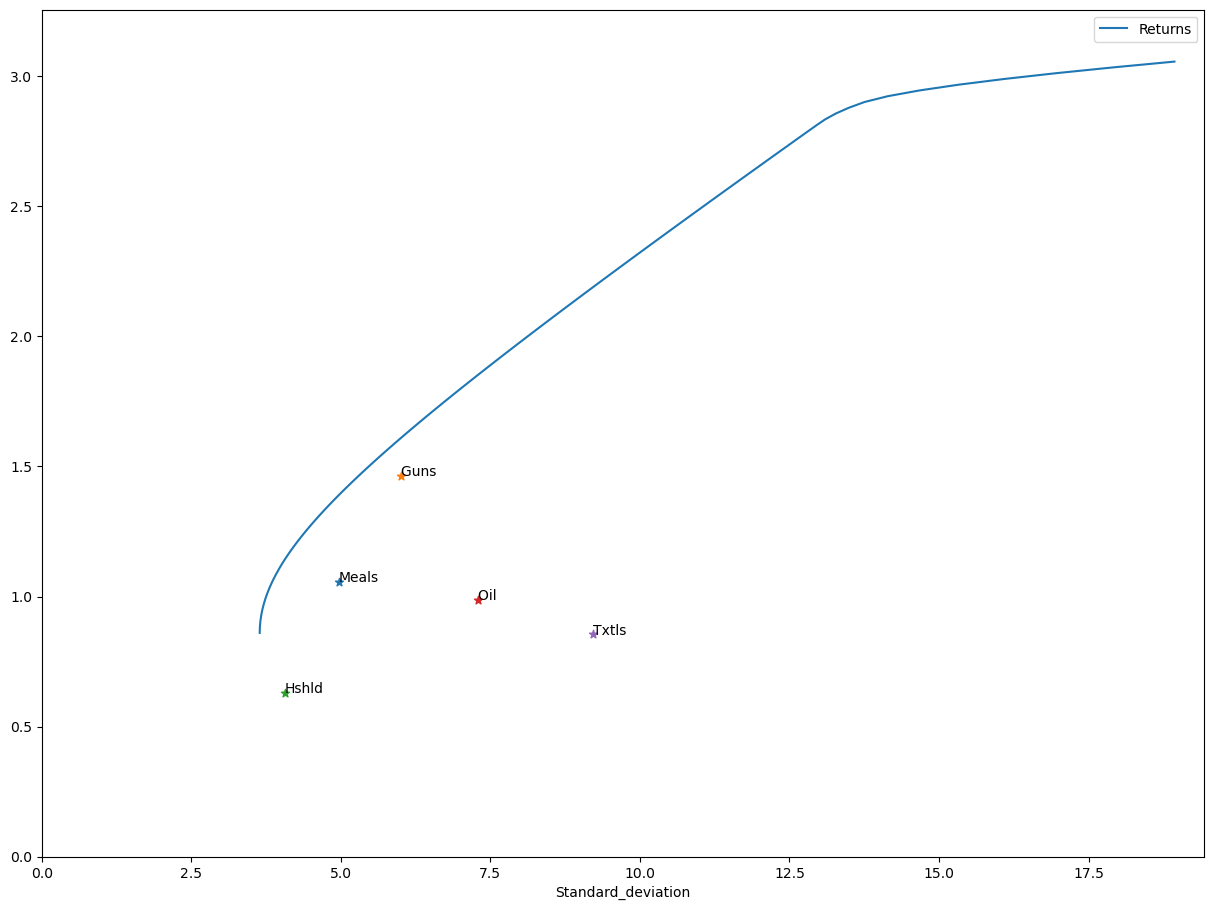

In [11]:
plt=Efficient_frontiere_result['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), xlim = [0, max(Efficient_frontiere_result['Efficient_frontiere'].index)+0.5], 
     ylim = [0, max(Efficient_frontiere_result['Efficient_frontiere']['Returns'])+0.2])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()

    

### B/ Mean-Variance frontier without risk-free asset (without short sell) :

#### Determination of the maximum return portfolio (without short sell) :

In [12]:
# Should give 100% in the industrie with the highest expetected return :

Max_return_result_W_O_S = Max_return_ptf(Initial_weights,bounds,constraints_max_ret,Industrie_selected,E_return)

##### Determination of the minimum-variance  portfolio  :

In [13]:
Min_var_result_W_O_S = Min_var_ptf(Initial_weights,bounds,constraints_min_var,Industrie_selected,E_cov,E_return)

##### Determination of the optimal  portfolio  for a given return  :

In [14]:
## Input : 

# Initialize the target return use for the frontier :

Target_return_W_O_S = np.linspace (Min_var_result_W_O_S['Min_var_return'].iloc[0]['return'],Max_return_result_W_O_S['Max_ret_return'].iloc[0]['return'],Nbr_PTF)

# Initialize un empty array for the differente variance value optimize  :

Var_level_W_O_S = np.zeros([1,Nbr_PTF])
Weigth_level_W_O_S = np.zeros([5,Nbr_PTF])

In [15]:
Efficient_frontiere_result_W_O_S = Ptf_target_optimization(Target_return_W_O_S,Initial_weights,bounds,Nbr_PTF,Var_level_W_O_S,Weigth_level_W_O_S,Industrie_selected,E_cov,E_return)

#### Result presentation : 

[]

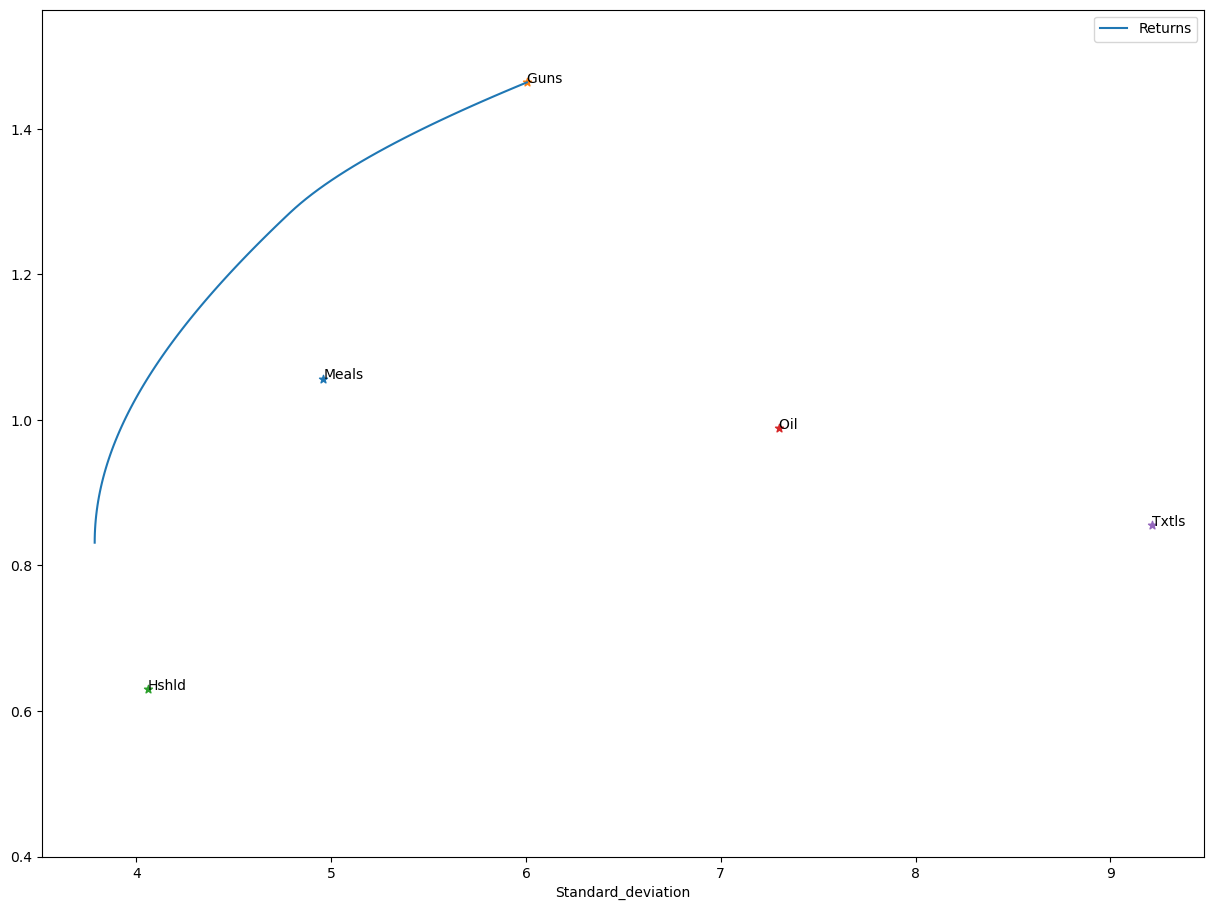

In [16]:
plt=Efficient_frontiere_result_W_O_S['Efficient_frontiere']['Returns'].plot(kind='line',figsize=(15,11), 
     ylim = [0.4, max(Efficient_frontiere_result_W_O_S['Efficient_frontiere']['Returns'])+0.1])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()


## Part 2

### B/ Mean-Variance frontier with risk-free asset (with short sell) :

In [32]:
# Input : 

# Importation of the SOFR :

SOFR_path=r"C:\Users\admin\Desktop\Gestion ptf (cours)\SOFR30DAYAVG.xls" #enter your path linked to the location of your csv file for import


Data_SOFR = pd.read_excel(SOFR_path)

Data_SOFR['observation_date'] = pd.to_datetime(Data_SOFR['observation_date'], format='%Y-%m-%d')
Data_SOFR.set_index('observation_date', inplace=True)

Data_SOFR=Data_SOFR.dropna()

DATE = '2021-08-01'

Expected_Risk_free = Data_SOFR[Data_SOFR.index >= DATE].mean() # do again 
Expected_Risk_free= Expected_Risk_free.iloc[0]

# Constraint :

constraints_W_RF = (
  {'type': 'eq', 'fun': lambda x: np.sum(x*(E_return.values-Expected_Risk_free)) - (target-Expected_Risk_free)}) # Optimization for a target return 

In [33]:
Expected_Risk_free

1.1492324043715851

#### Determination of the maximum return portfolio (with short sell) :

##### Determination of the optimal  portfolio  for a given return  :

In [34]:
## Input : 

# Initialize the target return use for the frontier :

Target_return_W_R = np.linspace (Expected_Risk_free,Max_return_result['Max_ret_return'].iloc[0]['return'],Nbr_PTF)
#Target_return_W_R = np.linspace (-Max_return_result['Max_ret_return'].iloc[0]['return'],Max_return_result['Max_ret_return'].iloc[0]['return'],Nbr_PTF)

# Initialize un empty array for the differente variance value optimize and weigth  :

Var_level_W_R_W_S = np.zeros([1,Nbr_PTF])
Weigth_level_W_R_W_S = np.zeros([6,Nbr_PTF])

Weigth_names = np.concatenate ((np.array(['Risk_free']),Industrie_selected.values))

In [35]:
EF_W_R_W_S =Ptf_target_optimization_W_Rf(Target_return_W_R,Initial_weights,Nbr_PTF,Var_level_W_R_W_S,Weigth_level_W_R_W_S,E_cov,E_return,Expected_Risk_free,Weigth_names,bounds_short_sell)

In [36]:
EF_W_R_W_S['Efficient_frontiere_weigth']

,Risk_free,Meals,Guns,Hshld,Oil,Txtls
0,0.999962,0.000003,0.000008,0.000019,0.000073,-0.000066
1,1.013570,0.007369,0.012182,-0.029950,-0.002713,-0.000458
2,1.027135,0.014738,0.024364,-0.059897,-0.005419,-0.000922
3,1.040702,0.022107,0.036546,-0.089846,-0.008126,-0.001384
4,1.054269,0.029476,0.048729,-0.119795,-0.010832,-0.001847
...,...,...,...,...,...,...
95,1.699274,0.219618,1.956777,-2.000000,-0.452952,-0.422718
96,1.691957,0.209958,1.997293,-2.000000,-0.462626,-0.436583
97,1.749296,0.231716,2.000000,-2.000000,-0.489746,-0.491266
98,1.811250,0.255741,2.000000,-2.000000,-0.518112,-0.548879


[]

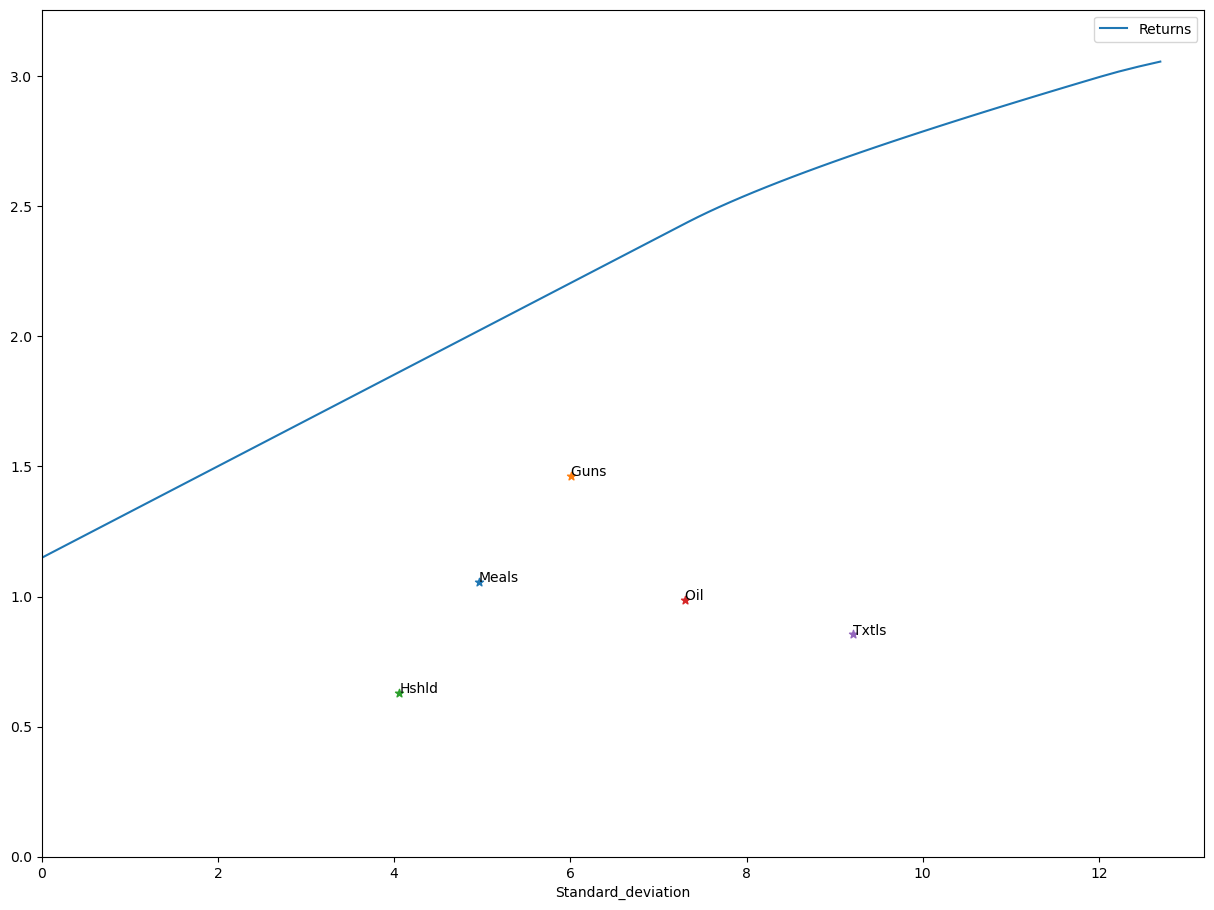

In [37]:
plt=EF_W_R_W_S['Efficient_frontiere'].plot(kind='line',figsize=(15,11), xlim = [0, max(EF_W_R_W_S['Efficient_frontiere'].index)+0.5], 
     ylim = [0, max(EF_W_R_W_S['Efficient_frontiere']['Returns'])+0.2])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()

#### Determination of the maximum return portfolio (without short sell) :

In [23]:
## Input :

Expected_return_W_RF= np.concatenate((np.array([Expected_Risk_free]),E_return))


# Initialize the target return use for the frontier :

#Target_return_W_R_WO_S = np.linspace (Expected_Risk_free,Max_return_result_W_O_S['Max_ret_return'].iloc[0]['return'],Nbr_PTF)

Target_return_W_R_WO_S = np.linspace (Expected_Risk_free,Max_return_result['Max_ret_return'].iloc[0]['return'],Nbr_PTF)

# Initialize un empty array for the differente variance value optimize and weigth  :

Var_level_W_R_WO_S = np.zeros([1,Nbr_PTF])
Weigth_level_W_R_WO_S = np.zeros([6,Nbr_PTF])


# Spécifique boudaries : 

bounds_emprunt = tuple((0, 2) for w in Initial_weights) # If short sell possible under limit

In [24]:
EF_W_R_WO_S = Ptf_target_optimization_W_Rf(Target_return_W_R_WO_S,Initial_weights,Nbr_PTF,Var_level_W_R_WO_S,Weigth_level_W_R_WO_S,E_cov,E_return,Expected_Risk_free,Weigth_names,bounds_emprunt)

[]

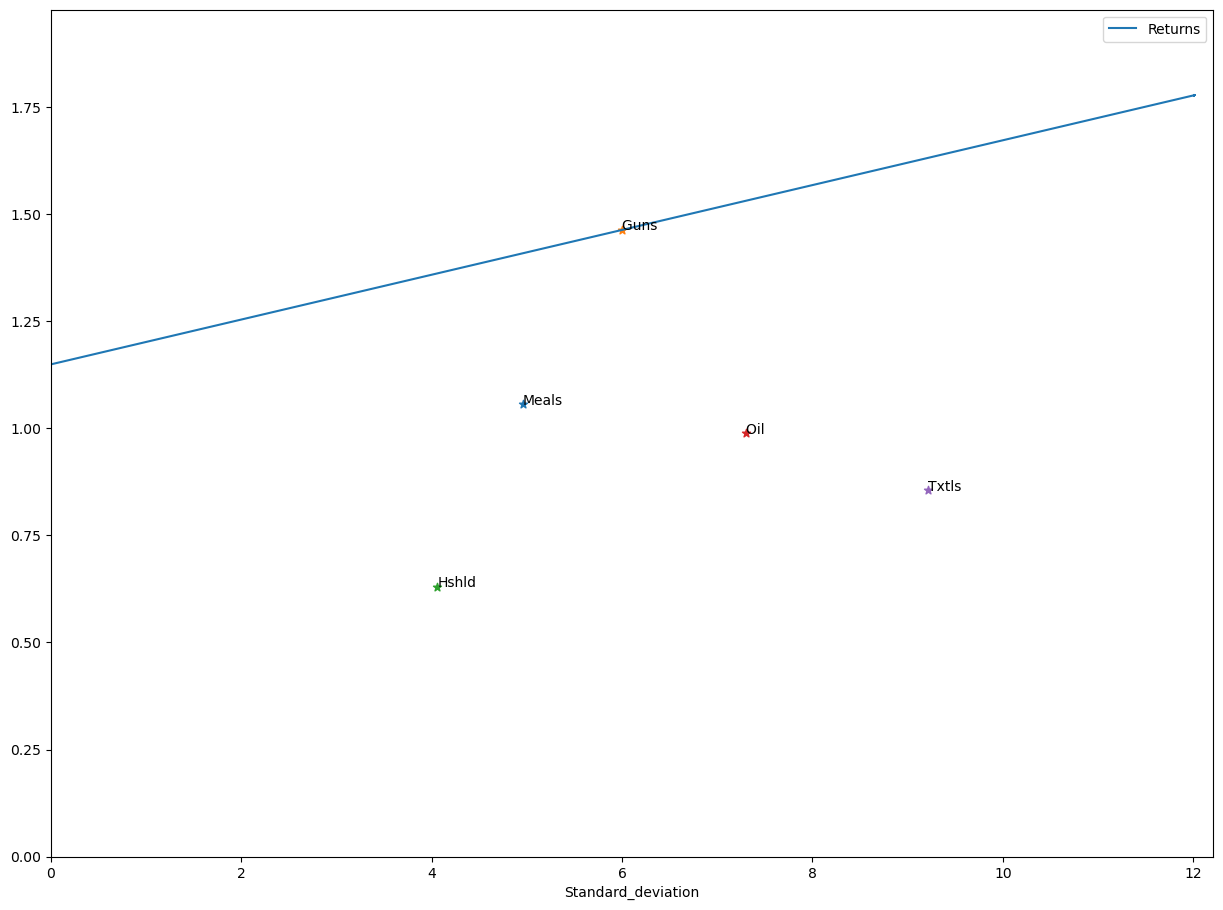

In [25]:
plt=EF_W_R_WO_S['Efficient_frontiere'].plot(kind='line',figsize=(15,11), xlim = [0,max(EF_W_R_WO_S['Efficient_frontiere'].index)+0.2], 
     ylim = [0, max(EF_W_R_WO_S['Efficient_frontiere']['Returns'])+0.2])
for i in E_return.index :
    plt.scatter([np.sqrt(E_cov[i][i])],[E_return[i]], marker='*')
    plt.annotate(i,(np.sqrt(E_cov[i][i]),E_return[i]))
                 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.plot()